# Scraping the List: Female CEOs of the S&P 500 Companies:

> Data: https://www.catalyst.org/research/women-ceos-of-the-sp-500/

Goals of Web Scraping Project: 

- Scraping the list of Female CEOs
- Scraping the corresponding Company Name
- Getting all the links attached to the profile

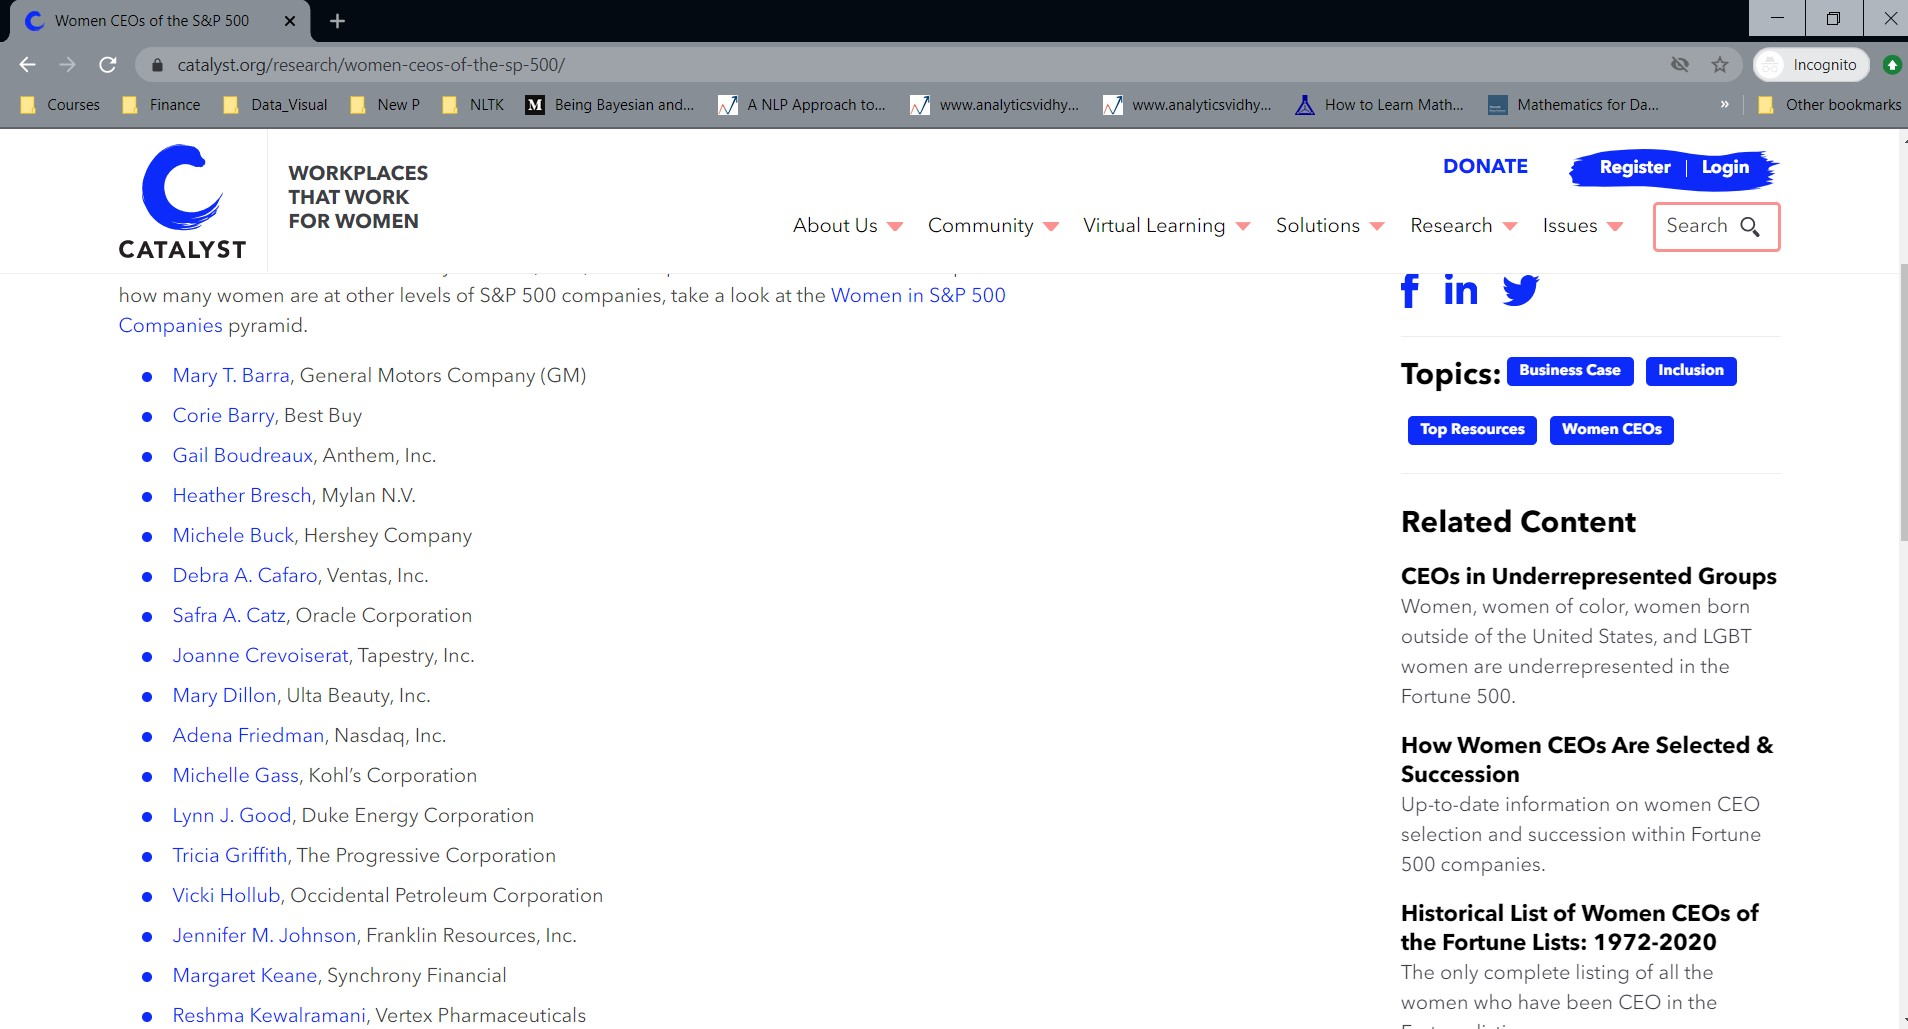

In [18]:
Image("ceolist.jpg")

In [1]:
# Importing the Necessary Library:

import requests # to request the standard html
from bs4 import BeautifulSoup # tool for parsing the html

# For creating the data frame and standard library for organising data
import pandas as pd 

from IPython.display import Image # importing the image's in the notebook


In [2]:
URL = "https://www.catalyst.org/research/women-ceos-of-the-sp-500/"
page = requests.get(URL)
page.encoding = 'ISO-885901'
soup = BeautifulSoup(page.text, 'html.parser')

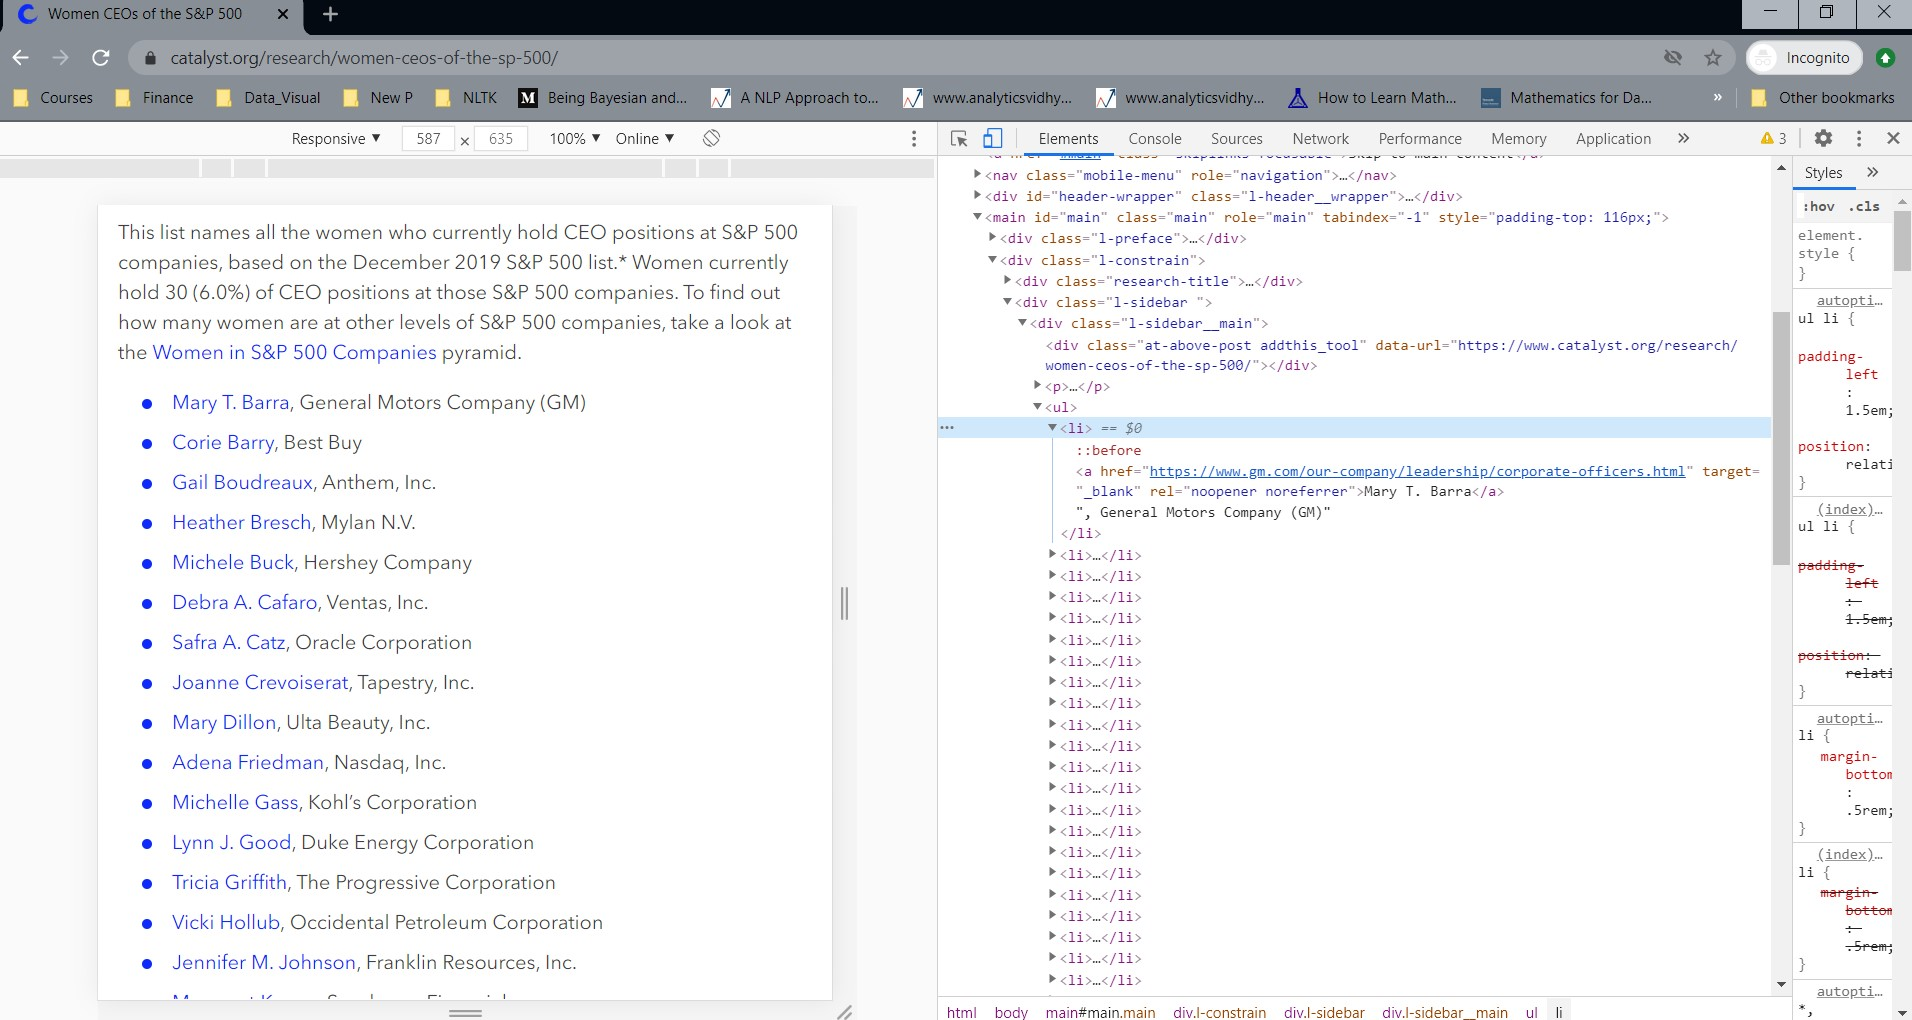

In [19]:
Image("ceoinspect.jpg")

In [3]:
# Getting all the data of list nested in the Class=main:
list_data = soup.find("main").findAll("li")
print(list_data[:32])

[<li><a href="https://www.gm.com/our-company/leadership/corporate-officers.html" rel="noopener noreferrer" target="_blank">Mary T. Barra</a>, General Motors Company (GM)</li>, <li><a href="https://corporate.bestbuy.com/about-best-buy/" rel="noopener noreferrer" target="_blank">Corie Barry</a>, Best Buy</li>, <li><a href="https://www.antheminc.com/AboutAnthemInc/Leadership/ExecutiveLeadership/index.htm" rel="noopener noreferrer" target="_blank">Gail Boudreaux</a>, Anthem, Inc.</li>, <li><a href="https://www.mylan.com/en/about-mylan/leadership/ceo-heather-bresch" rel="noopener noreferrer" target="_blank">Heather Bresch</a>, Mylan N.V.</li>, <li><a href="https://www.thehersheycompany.com/content/corporate_SSF/en_us/our-story/remarkable-people/leadership.html" rel="noopener noreferrer" target="_blank">Michele Buck</a>, Hershey Company</li>, <li><a href="https://www.ventasreit.com/about-ventas/leadership" rel="noopener noreferrer" target="_blank">Debra A. Cafaro</a>, Ventas, Inc.</li>, <li>

In [4]:
len(list_data) # checking the length of list

32

In [5]:
lists = list_data[0] # sampling the list data
list_content = lists.contents
print(list_content)

[<a href="https://www.gm.com/our-company/leadership/corporate-officers.html" rel="noopener noreferrer" target="_blank">Mary T. Barra</a>, ', General Motors Company (GM)']


In [6]:
list_content = lists.contents[0] # getting the contents of the "a" tag
list_content.attrs

{'href': 'https://www.gm.com/our-company/leadership/corporate-officers.html',
 'target': '_blank',
 'rel': ['noopener', 'noreferrer']}

In [8]:
list_href = list_content['href']
print(list_href)

https://www.gm.com/our-company/leadership/corporate-officers.html


In [9]:
comp_hrefs = [] # Creating an empty list

for i in list_data:
    cont = i.contents[0]
    href = cont['href']
    comp_hrefs.append(href) #iterating over the links 

# check to be sure all went well
for i in comp_hrefs[0:]:
    print(i)

https://www.gm.com/our-company/leadership/corporate-officers.html
https://corporate.bestbuy.com/about-best-buy/
https://www.antheminc.com/AboutAnthemInc/Leadership/ExecutiveLeadership/index.htm
https://www.mylan.com/en/about-mylan/leadership/ceo-heather-bresch
https://www.thehersheycompany.com/content/corporate_SSF/en_us/our-story/remarkable-people/leadership.html
https://www.ventasreit.com/about-ventas/leadership
https://www.oracle.com/corporate/executives/catz/
https://www.tapestry.com/leadership/
http://ir.ultabeauty.com/governance/management/default.aspx
https://www.nasdaq.com/about/our-people/adena-t.-friedman
https://corporate.kohls.com/company/leadership
https://www.duke-energy.com/our-company/about-us/leadership/lynn-j-good
https://www.progressive.com/about/leadership/
https://www.oxy.com/investors/Governance/Board-of-Directors/Pages/Vicki-A-Hollub.aspx
https://investors.franklinresources.com//news-center/press-releases/press-release-details/2019/Franklin-Resources-Inc-Appoints

In [10]:
name =[] # Creating an empty list

for tag in soup.find("main").findAll("li"):
    name.append(tag.text)  #iterating over the values 

for tag in name[0:]:
    print(tag)

Mary T. Barra, General Motors Company (GM)
Corie Barry, Best Buy
Gail Boudreaux, Anthem, Inc.
Heather Bresch, Mylan N.V.
Michele Buck, Hershey Company
Debra A. Cafaro, Ventas, Inc.
Safra A. Catz, Oracle Corporation
Joanne Crevoiserat, Tapestry, Inc.
Mary Dillon, Ulta Beauty, Inc.
Adena Friedman, Nasdaq, Inc.
Michelle Gass, Kohl’s Corporation
Lynn J. Good, Duke Energy Corporation
Tricia Griffith, The Progressive Corporation
Vicki Hollub, Occidental Petroleum Corporation
Jennifer M. Johnson, Franklin Resources, Inc.
Margaret Keane, Synchrony Financial
Reshma Kewalramani, Vertex Pharmaceuticals
Christine A. Leahy, CDW Corporation
Phebe N. Novakovic, General Dynamics Corporation
Lisa Palmer, Regency Centers Corporation
Kristin Peck, Zoetis
Patricia K. Poppe, CMS Energy Corporation
Barbara Rentler, Ross Stores, Inc.
Lori J. Ryerkerk, Celanese Corporation
Lisa Su, Advanced Micro Devices, Inc.
Julie Sweet, Accenture
Sonia Syngal, Gap Inc.
Carol Tomé, United Parcel Service Inc.
Jayshree Ullal,

In [11]:
len(name)

32

In [12]:
len(comp_hrefs)

32

In [13]:
data = pd.DataFrame(name, columns=['CEO'])
data['Comp_Info']=comp_hrefs
data

,CEO,Comp_Info
0,"Mary T. Barra, General Motors Company (GM)",https://www.gm.com/our-company/leadership/corp...
1,"Corie Barry, Best Buy",https://corporate.bestbuy.com/about-best-buy/
2,"Gail Boudreaux, Anthem, Inc.",https://www.antheminc.com/AboutAnthemInc/Leade...
3,"Heather Bresch, Mylan N.V.",https://www.mylan.com/en/about-mylan/leadershi...
4,"Michele Buck, Hershey Company",https://www.thehersheycompany.com/content/corp...
5,"Debra A. Cafaro, Ventas, Inc.",https://www.ventasreit.com/about-ventas/leader...
6,"Safra A. Catz, Oracle Corporation",https://www.oracle.com/corporate/executives/catz/
7,"Joanne Crevoiserat, Tapestry, Inc.",https://www.tapestry.com/leadership/
8,"Mary Dillon, Ulta Beauty, Inc.",http://ir.ultabeauty.com/governance/management...
9,"Adena Friedman, Nasdaq, Inc.",https://www.nasdaq.com/about/our-people/adena-...


> Our data in the "CEO" column has CEO name as well as Company name, to have them in seperate columns we will use the string split function: 

In [14]:
# new data frame with split value columns 
new = data["CEO"].str.split(",", n = 1, expand = True) 
  
# making separate CEO name column from new data frame 
data["CEO"]= new[0] 
  
# making separate Company name column from new data frame 
data["Company Name"]= new[1]

In [15]:
data = data[['CEO', 'Company Name', 'Comp_Info']]

> Final output:

In [16]:
data

,CEO,Company Name,Comp_Info
0,Mary T. Barra,General Motors Company (GM),https://www.gm.com/our-company/leadership/corp...
1,Corie Barry,Best Buy,https://corporate.bestbuy.com/about-best-buy/
2,Gail Boudreaux,"Anthem, Inc.",https://www.antheminc.com/AboutAnthemInc/Leade...
3,Heather Bresch,Mylan N.V.,https://www.mylan.com/en/about-mylan/leadershi...
4,Michele Buck,Hershey Company,https://www.thehersheycompany.com/content/corp...
5,Debra A. Cafaro,"Ventas, Inc.",https://www.ventasreit.com/about-ventas/leader...
6,Safra A. Catz,Oracle Corporation,https://www.oracle.com/corporate/executives/catz/
7,Joanne Crevoiserat,"Tapestry, Inc.",https://www.tapestry.com/leadership/
8,Mary Dillon,"Ulta Beauty, Inc.",http://ir.ultabeauty.com/governance/management...
9,Adena Friedman,"Nasdaq, Inc.",https://www.nasdaq.com/about/our-people/adena-...
